<a href="https://colab.research.google.com/github/rezazamani2329/UC-Berkeley--Neural-Networks-1/blob/main/neural_network1_UC_Berkelry_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network 1

# import libraries
# import data from make_blobs

<Axes: xlabel='x1', ylabel='x2'>

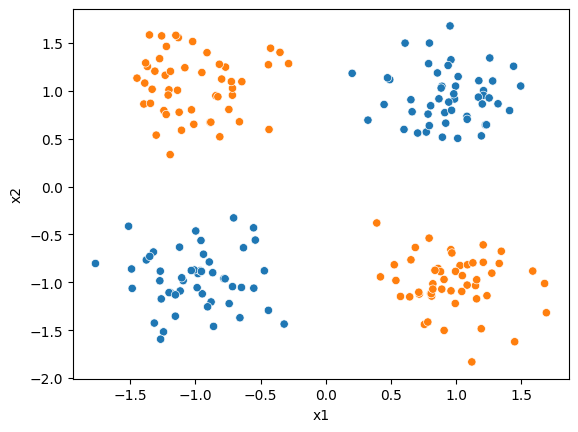

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

x, y = make_blobs(n_samples = [50, 50, 50, 50], n_features = 2, random_state = 0, centers = ((-1, -1), (-1, 1), (1, -1), (1, 1)), cluster_std = 0.3)
df = pd.DataFrame(data = x, columns = ["x1", "x2"])
df["y"] = y
df = df.replace(3, 0)
df = df.replace(2, 1)
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)

## **Part One**



## define visualization decision boundaries at first

In [2]:
def visualize_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age")

###  using tensorflow, keras and layers to create model with Sequential
###   use Dense to create layers

In [3]:

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(3, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(2, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### Apply compile for model

In [4]:
# compile model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Fit the model

In [5]:
np.random.seed(12)
history = model.fit(x = df[["x1", "x2"]],
                    y = df["y"],
                    epochs=5,
                    batch_size=8)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5437 - loss: 0.6180
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4264 - loss: 0.6054  
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4895 - loss: 0.6007 
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5867 - loss: 0.5692 
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - loss: 0.5601 


### Visualize the model for the first time

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


<Axes: xlabel='fare', ylabel='age'>

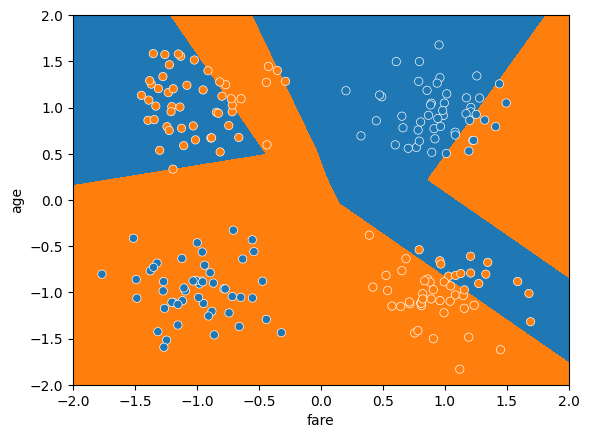

In [22]:
visualize_decision_boundaries(model, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)

## create a more complex neural network, we'll require more epochs to train.
## we also use 16 neuron i neach internal layer

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

np.random.seed(20)
history = model.fit(x = df[["x1", "x2"]],
                    y = df["y"],
                    epochs=20,
                    batch_size=8)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5391 - loss: 0.6774
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6457 - loss: 0.6200 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.5808 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9307 - loss: 0.5184 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9314 - loss: 0.4803 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9671 - loss: 0.4008 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.3758 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.3047
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9968 - loss: 0.2595
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9924 - loss: 0.1989  
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.1625 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: xlabel='fare', ylabel='age'>

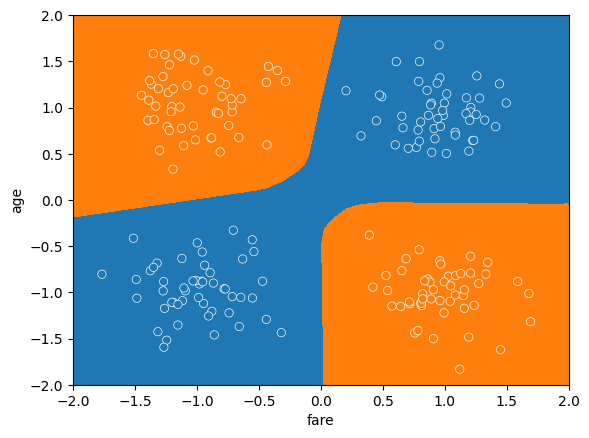

In [26]:
visualize_decision_boundaries(model, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)

## **Part Two-  Using a Neural Net for Non-Concentric Data**
## **Check accuracy and loss**

libararies

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings

from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


warnings.filterwarnings('ignore')

### Data

In [7]:
X, y = make_blobs([50, 50, 50, 50], centers = [[0, 5], [5, 0], [5, 5], [0, 0]],
                 random_state=42)

In [8]:
y[(y == 0) | (y == 1)] = 1
y[(y == 2) | (y == 3)] = 0

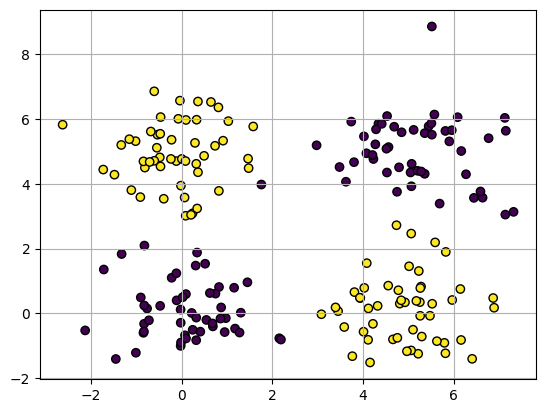

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'black')
plt.grid();

#### The Network Architecture

In [14]:
model = Sequential([Dense(100, activation = 'relu'),
                   Dense(1, activation = 'sigmoid')])
model.compile(loss = 'bce', metrics = ['acc'])
history = model.fit(X, y, epochs = 100, verbose = 0, validation_split = 0.2)


# CHECK
print(history.history['acc'][-1])

0.981249988079071


In [15]:
print(history.history.keys())

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


### check the optimum epoch are needed with visualization for loss function

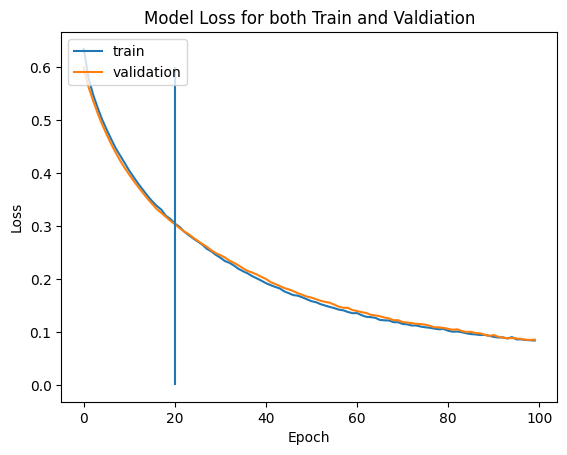

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for both Train and Valdiation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.vlines (x=20, ymin = 0, ymax= 0.6, label='best epoc')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

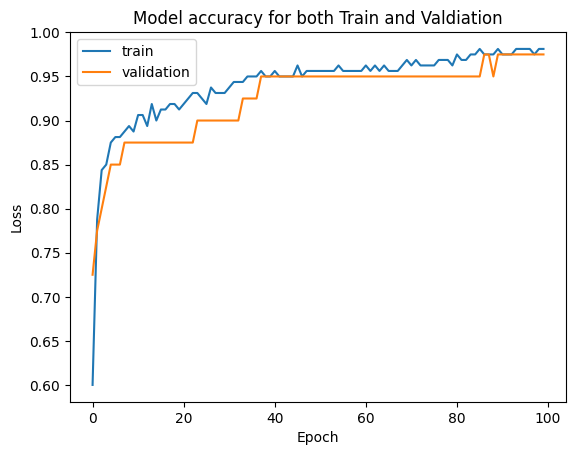

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy for both Train and Valdiation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## **Part Three- Full Network Example**

libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

## data

In [26]:
titanic = sns.load_dataset('titanic')
X = titanic.loc[:, ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class']]
y = titanic['survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       714 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float64 
 6   embarked  889 non-null    object  
 7   class     891 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 49.9+ KB


#### Preparing the features

In [27]:
X['age'] = X['age'].fillna(X['age'].mean())


mct = make_column_transformer((OneHotEncoder(drop='if_binary'),['sex', 'embarked', 'class']),
                           remainder=StandardScaler())
X_t = mct.fit_transform(X)

###  CHECK
X_t.shape

(891, 13)

#### The Network Architecture

In [28]:
tf.random.set_seed(42)
model = Sequential([
    Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

#### Train and Evaluate the Network

In [45]:
tf.random.set_seed(42)

# use sequential at first to create layer
model = Sequential([
    Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# compile the model
model.compile(loss = 'bce', optimizer = 'rmsprop',
                     metrics = ['accuracy'])
# fit the model
np.random.seed(42)
hist = model.fit(X_t, y, epochs = 20, batch_size = 10,
              verbose = 0)


###  CHECK
hist.history ['accuracy'][-1]

0.8462401628494263

In [32]:
hist.history

{'accuracy': [0.7654321193695068,
  0.7912458181381226,
  0.8103255033493042,
  0.8237934708595276,
  0.8282828330993652,
  0.8271604776382446,
  0.8249158263206482,
  0.8249158263206482,
  0.8249158263206482,
  0.8294051885604858,
  0.8305274844169617,
  0.8372614979743958,
  0.8383838534355164,
  0.8439955115318298,
  0.8451178669929504,
  0.8462401628494263,
  0.8451178669929504,
  0.8439955115318298,
  0.8417508602142334,
  0.8439955115318298],
 'loss': [0.5665866732597351,
  0.4912635087966919,
  0.4595722258090973,
  0.44075167179107666,
  0.4287102222442627,
  0.4206588566303253,
  0.4149250388145447,
  0.4103807210922241,
  0.4068423807621002,
  0.4038148522377014,
  0.40121811628341675,
  0.39885032176971436,
  0.3968152105808258,
  0.3950696885585785,
  0.39343807101249695,
  0.392107754945755,
  0.390811026096344,
  0.38964352011680603,
  0.3885420560836792,
  0.3876613974571228]}

In [36]:
hist.history.keys()

dict_keys(['accuracy', 'loss'])

#### Evaluate the model

In [44]:
results =  model.evaluate(X_t, y)
single_loss = results[0]
single_acc = results[1]


### ANSWER CHECK
print(single_loss)
print(single_acc)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.4098 
0.3864981532096863
0.8406285047531128


## **Part Four- Multiclass and NN**

In [46]:
import seaborn as sns
iris = sns.load_dataset("iris")
from sklearn.utils import shuffle
iris = shuffle(iris)
iris = iris.replace("versicolor", 0)
iris = iris.replace("setosa", 1)
iris = iris.replace("virginica", 2)


In [47]:
import numpy as np
train, dev = np.split(iris, [110])

In [48]:
from sklearn.preprocessing import StandardScaler
std_clf = StandardScaler()
#x_train_new = std_clf.fit_transform(train[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
#x_dev_new = std_clf.transform(dev[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
x_train_new = std_clf.fit_transform(train[["petal_length", "petal_width"]])
x_dev_new = std_clf.transform(dev[["petal_length", "petal_width"]])

## we use 'softmax' as activation for output to show we are working with multiclasses

In [49]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [50]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [51]:
story = model.fit(x_train_new,
                    train["species"],
                    epochs=20,
                    batch_size=1,
                    validation_data=(x_dev_new, dev["species"]))

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6363 - loss: 0.9674 - val_accuracy: 0.9500 - val_loss: 0.7935
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8502 - loss: 0.7027 - val_accuracy: 0.7500 - val_loss: 0.6083
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7747 - loss: 0.5256 - val_accuracy: 0.8250 - val_loss: 0.4936
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4305 - val_accuracy: 0.9500 - val_loss: 0.4130
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3605 - val_accuracy: 0.9750 - val_loss: 0.3500
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9136 - loss: 0.3080 - val_accuracy: 1.0000 - val_loss: 0.2963
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9298 - loss: 0.2633 - val_accuracy: 0.9750 - val_loss: 0.2508
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9192 - loss: 0.2272 - val_accuracy: 0.

In [52]:
class Onehot2Int():

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model(X)
        return np.argmax(y_pred, axis=1)

<Axes: >

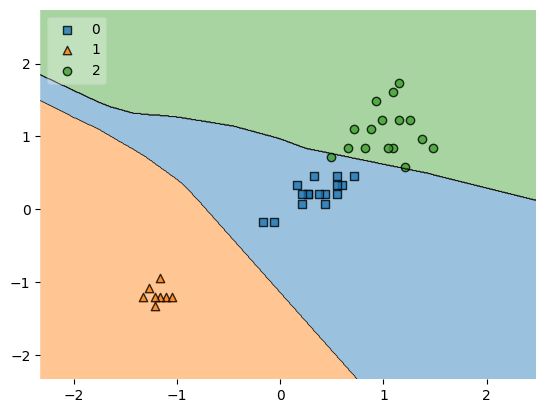

In [53]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_dev_new, dev["species"].values, clf=Onehot2Int(model), legend=2)

In [54]:
def visualize_3class_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age")

<Axes: xlabel='fare', ylabel='age'>

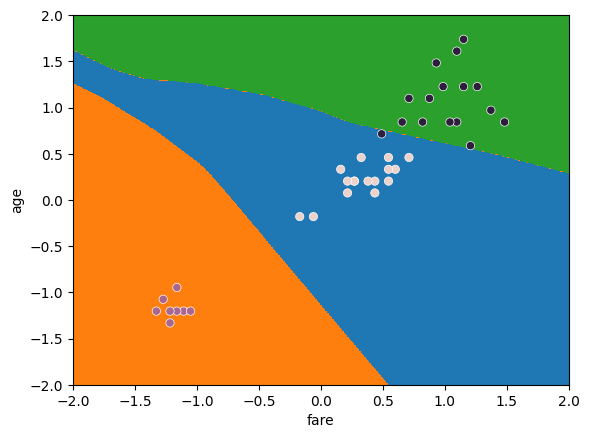

In [55]:
visualize_3class_decision_boundaries(Onehot2Int(model), [-2, 2], [-2, 2])
sns.scatterplot(x = x_dev_new[:, 0], y = x_dev_new[:, 1], hue = dev["species"].values, legend = False)

## Another example of multi class for NN with encoders

Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets

Defining functions for plot

In [57]:
colormap = {0:'black', 1:'red', 2:'blue'}
flower_colormap = {'setosa':'black','versicolor':'red','virginica':'blue'}
flower_map = {'setosa':0,'versicolor':1,'virginica':2}
def plot_region(model,dlim):
    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()

    d12_array = np.empty((len(X0),2))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
    i=2

    y_array = model.predict(d12_array)
    y_array = np.array([flower_map[xx] for xx in lb.inverse_transform(y_array)])
    y_grid = y_array.reshape(d1_grid.shape)
    plt.contourf(d1_grid, d2_grid, y_grid, cmap='Pastel2')

In [58]:
def plot_region_scatter(model):

    plt.figure(figsize=(8,7))

    # Data with a scatter plot
    s = plt.scatter(x=X[:,0], y=X[:,1], c=[flower_colormap[yy] for yy in y])
    a = plt.axis()
    s.set_zorder(2)

    # plot the two regions
    plot_region(model,a)

    plt.xlabel(x0,fontsize=20)
    plt.ylabel(x1,fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

Data

In [59]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = data.target_names[data.target]


iris.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace=True)

x0 = 'petal_length'
x1 = 'petal_width'
iris.rename(columns={'petal length (cm)':x0,'petal width (cm)':x1},inplace=True)
iris

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


# extract input and output columns

In [60]:
X = iris[[x0,x1]].to_numpy()
y = iris['species'].to_numpy()

In [61]:
x

array([[-0.31907361, -1.4363097 ],
       [ 1.08235491,  0.73272548],
       [-0.98004483, -0.90925843],
       [-1.36763066,  1.25330889],
       [-1.2410229 ,  0.79313507],
       [-0.71497347, -1.04540716],
       [-1.51188106, -0.41476738],
       [ 0.89059194,  1.04701116],
       [ 1.01158917,  0.50298547],
       [-0.54016624, -0.55919237],
       [ 1.20694545, -0.60944613],
       [ 0.65279342,  0.90631232],
       [ 0.95921509, -0.65893259],
       [-1.23097482,  1.16177476],
       [ 1.69117501, -1.31800475],
       [ 0.49056825,  1.11618414],
       [-1.32122579, -0.68366448],
       [ 0.80431192,  0.84364321],
       [-1.02953576,  0.80095651],
       [ 1.32055282,  0.86398426],
       [ 1.02931749, -0.8251139 ],
       [-0.71582441,  0.95349697],
       [-0.43973231,  1.2718134 ],
       [ 0.90729611, -1.50280114],
       [ 1.08590311, -0.81734685],
       [-1.13054607,  1.55477912],
       [-1.2218689 ,  1.46290438],
       [-0.843017  ,  0.9485361 ],
       [-1.24394388,

In [62]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

input labelbinerizer

In [66]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_oh = lb.fit_transform(y)

In [67]:
y_oh[:10,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

inverse tranfrom

In [78]:
lb.inverse_transform(y_oh[:10,:])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

## Define The Neural Network Model


## we define 'softmax' as acivation to show are working with multiclasses

In [69]:
model = Sequential([
    Dense(5, input_dim=2, activation='relu'),
    Dense(3, activation="softmax") ])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, y_oh, epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3533 - loss: 1.0218  
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3533 - loss: 1.0039 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3533 - loss: 0.9920  
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3533 - loss: 0.9824  
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3533 - loss: 0.9741
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3533 - loss: 0.9668 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3533 - loss: 0.9601 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3533 - loss: 0.9539 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3533 - loss: 0.9480 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3533 - loss: 0.9424 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3533 - loss: 0.9369 
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3533 - 

Plot of accuracy

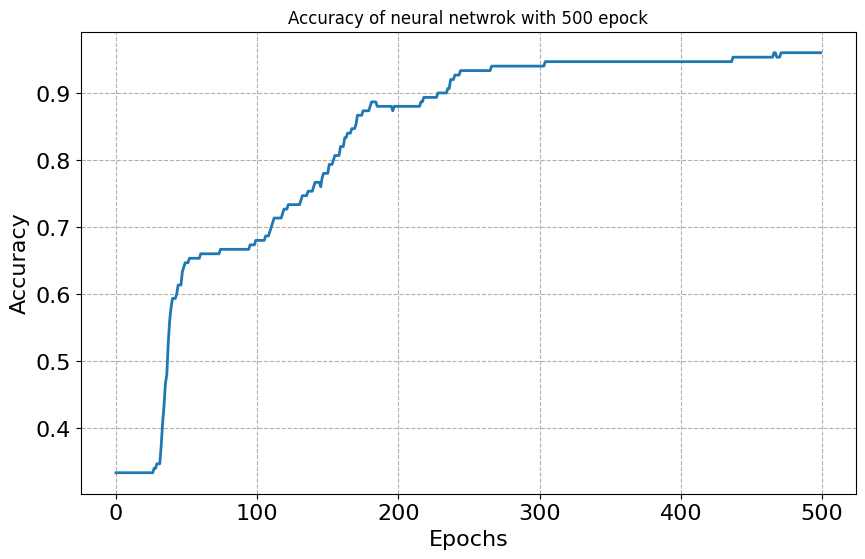

In [73]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], linewidth=2)
plt.grid(linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title ('Accuracy of neural netwrok with 500 epock')
plt.show()

In [75]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

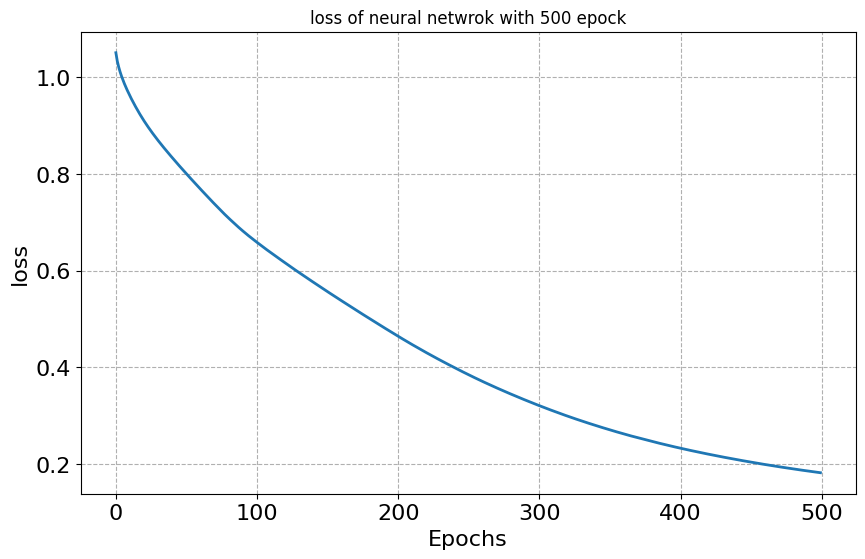

In [76]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], linewidth=2)
plt.grid(linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title ('loss of neural netwrok with 500 epock')
plt.show()

plot decision boundaries

1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


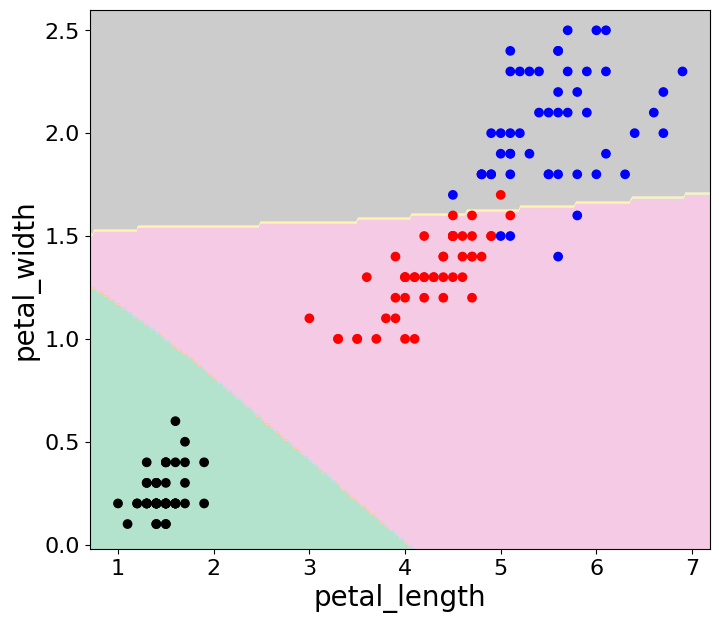

In [77]:
plot_region_scatter(model)